In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


%matplotlib inline


In [ ]:
df = pd.read_csv('heart - heart.csv')

In [ ]:
df.head()

,age,gender,cp,trtbps,chol,fbs,thalachh,exng,caa,output
0,63,1,3,145,233,1,150,0,0,1
1,37,1,2,130,250,0,187,0,0,1
2,41,0,1,130,204,0,172,0,0,1
3,56,1,1,120,236,0,178,0,0,1
4,57,0,0,120,354,0,163,1,0,1


In [ ]:
df.shape

(303, 10)

In [ ]:
df.columns

Index(['age', 'gender', 'cp', 'trtbps', 'chol ', 'fbs', 'thalachh', 'exng',
       'caa', 'output'],
      dtype='object')

In [ ]:
df['age'].unique()


array([37, 41, 56, 57, 44, 54, 48, 49, 64, 50, 58, 66, 43, 69, 59, 42, 40,
       71, 51, 65, 46, 45, 53, 39, 52, 47, 63, 34, 35, 62, 29, 55, 60, 68,
       67, 74, 76, 70, 61, 38])

In [ ]:
df.rename(columns={'chol ': 'chol'},inplace = True)


In [ ]:
df.describe()

,age,gender,cp,trtbps,chol,fbs,thalachh,exng,caa,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,4.000000,1.000000


In [ ]:
df_duplicate_rows = df[df.duplicated()]
df_duplicate_rows.shape

(1, 10)

In [ ]:
df.drop_duplicates(inplace = True)
print('After deleting duplicate rows:')
df.shape

After deleting duplicate rows:


(302, 10)

In [ ]:
df.isnull().sum()

age         0
gender      0
cp          0
trtbps      0
chol        0
fbs         0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

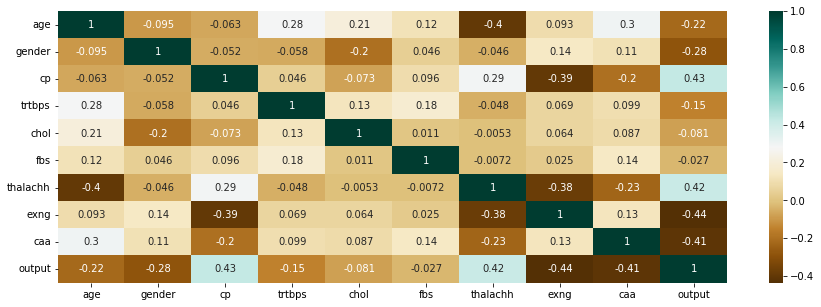

In [ ]:
c = df.corr()
plt.figure(figsize = (15,5))
sns.heatmap(c,cmap="BrBG",annot=True)


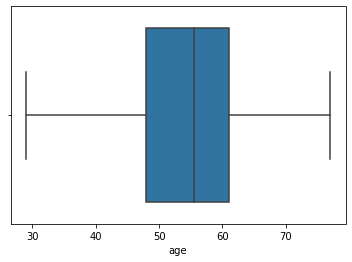

In [ ]:
sns.boxplot(x=df['age'])

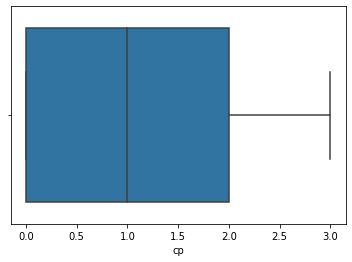

In [ ]:
sns.boxplot(x=df['cp'])

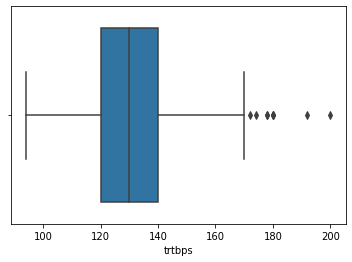

In [ ]:
sns.boxplot(x=df['trtbps'])

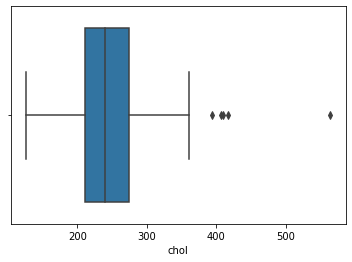

In [ ]:
sns.boxplot(x=df['chol'])

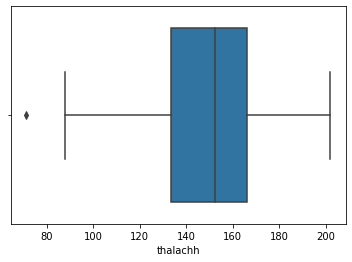

In [ ]:
sns.boxplot(x=df['thalachh'])

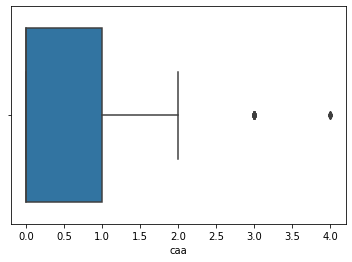

In [ ]:
sns.boxplot(x=df['caa'])

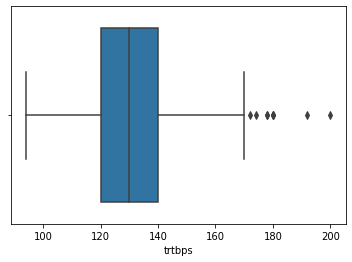

In [ ]:
sns.boxplot(x=df['trtbps'])

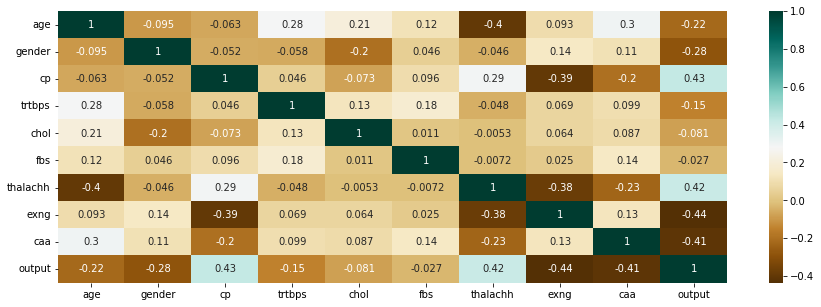

In [ ]:
c = df.corr()
plt.figure(figsize = (15,5))
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
y = df['output']
X = df.drop(['output','chol','fbs'],axis = 1)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

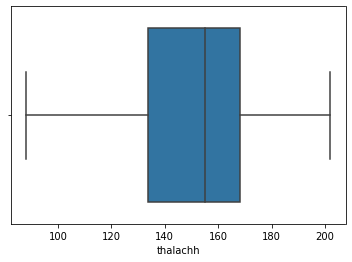

In [ ]:
sns.boxplot(x=df['thalachh'])

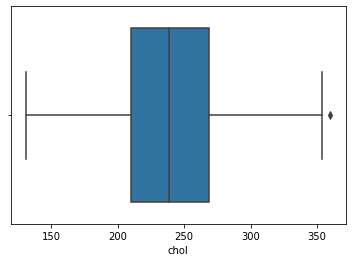

In [ ]:
sns.boxplot(x=df['chol'])

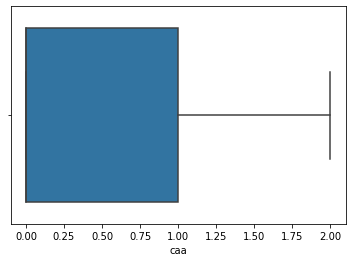

In [ ]:
sns.boxplot(x=df['caa'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)


In [ ]:
min_max=MinMaxScaler()
age = min_max.fit_transform(X_train['age'].values.reshape(-1,1))
trtbps = min_max.fit_transform(X_train['trtbps'].values.reshape(-1,1))
thalachh = min_max.fit_transform(X_train['thalachh'].values.reshape(-1,1))
X_train['age'] = age
X_train['trtbps'] = trtbps
X_train['thalachh'] = thalachh


In [ ]:
age = min_max.transform(X_test['age'].values.reshape(-1,1))
trtbps = min_max.transform(X_test['trtbps'].values.reshape(-1,1))
thalachh = min_max.transform(X_test['thalachh'].values.reshape(-1,1))
X_test['age'] = age
X_test['trtbps'] = trtbps
X_test['thalachh'] = thalachh


In [ ]:
X_train.head()

,age,gender,cp,trtbps,thalachh,exng,caa
118,0.354167,0,1,0.103774,0.770992,0,0
24,0.229167,1,3,0.433962,0.816794,1,0
287,0.583333,1,1,0.566038,0.709924,0,1
162,0.250000,1,1,0.245283,0.847328,0,0
132,0.270833,1,1,0.245283,0.694656,0,0


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)

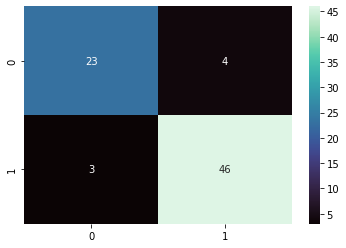

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix,cmap="mako",annot=True)

In [ ]:

print("Accuracy: %.3f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %.3f" % metrics.precision_score(y_test, y_pred))
print("Recall: %.3f" % metrics.recall_score(y_test, y_pred))

Accuracy: 0.908
Precision: 0.920
Recall: 0.939


In [ ]:

from sklearn.metrics import f1_score
print('F1 is: %.3f'% f1_score(y_test, y_pred))

F1 is: 0.929
